# **Artificial Intelligence: SciKit Learn and Graph Optimisation**
## **Part 1: Machine Learning**

## **1.1 Data Preparation**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Splitting Data
from sklearn.model_selection import train_test_split

# Normalisation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

# Regression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Performance Metrics of Models
from sklearn.metrics import mean_squared_error

# Cross Validation
from sklearn.model_selection import cross_val_score

## Creating & Labelling Pandas Data Frame
1. Please drag & drop the dataset file to the files folder in co-lab or have at the root directory of the ipynb file for the juniper notebook file.

In [58]:
# Contains all Data
# Notes: Data attributes are not labeled (Not Required: Will label to visualise the data before any ML (SVM, ANN...))

# shippingPD: Contains all shipping Data (Pandas Obj)
# Shape: (99,11) using np.shape()
cols = ["Ship_ID", "Ship_Name", "Year_Built", "Gross_tonnage", "Deadweight_tonnage", "Length_of_ship", "Width_of_ship", "Capacity", "Number_of_forward_bays", "Number_of_centre_bays", "Number_of_aft_bays"]
shipping_df = pd.read_csv("./containers.csv", names=cols)

In [59]:
# Slicing the to obtain the features matrix and excluding data not needed for training
feature_matrix = shipping_df.iloc[:,2:11]
targets_vector = shipping_df[["Capacity"]]

# Removing Targets from feature matrix
feature_matrix = feature_matrix.drop('Capacity', axis=1)

## Normalising the Data & PCA Transformation

Normalisation is benificial for the training of Artificial Neural networks and Support Vector Machines. However there is no need to normalise the data for decision trees as they work well with messy data and keep the explainability of the model.

Keeping the Principle Components is benificial, during my findings if I add this data preporcessing step after Normalising the data the accuracy of unseen data goes up significantly

In [60]:
scaler = MinMaxScaler()
feature_matrix_scaled = scaler.fit_transform(feature_matrix)

## Seperating Training & Testing Sets

Training : Test Split Ratio (70:30)

Reasoning
> The Models that will be trained should be generalised to not overfit to the training set. The accuracies shown for the training data will be misleading as it will appear to be much greater than the actural real world performace with unseen data (Schaffer, 1993).

Notes:

*   test_size=0.3: Sets the Train Test Split as 70:30
*   random_state: Set to Blank to shuffle randomly each time
*   Training Set is Normalised. Targets are not Normalised

## 1.2 Regression

Will run a different permutation of train test split for each model but same 70:30 train test split

In [61]:
# Calculating the Index to Split based on the 70:30 Split
# The full training set/feature matrix is normalised already
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_scaled, targets_vector, test_size=0.3)

## Training the Artificial Neural Network Regressor
*   Time ETA 45 Sec on Colab

55,000 iterations seems to accurately predict the test set indicating the model is not overfitted


In [62]:
ANN_regressor = MLPRegressor(max_iter=55_000)

# y_train Column Vector to Row Vector
ANN_regressor.fit(x_train, np.squeeze(y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (55000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=55000)

## Predicting the Testing Set

In [63]:
y_pred = ANN_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

# Used to compare the actual and the test
# print(mse)
# print(y_pred)
# print(y_test)

## Using the data above to predict the top 10 shipping containers

*   Effectively, mapping the index to the index of the ship name
*   Then Sorting the list via containers amount
*   Return top 10 via slicing





### Making Hashmap of Index to Ship_Name, Predicted_Capactity, Actual_Capacity

In [64]:
# List of Indexes
index_li = list(y_test.index.values)

# Hashmap of Key(Index), Values = [ [ship_name], [predicted_capacity], [actual_capacity] ]
map_shipping_containers = {}

# Mapped Data to Index: Using a Hashmap
i = 0
for current_index in index_li:
  map_shipping_containers[current_index + 1] = [  shipping_df.iloc[current_index,1] , y_pred[i] , shipping_df.iloc[current_index,7]]
  i += 1

# Displaying the unordered hashmap
# print( map_shipping_containers )

### Sorting Hashmap & Turning into a List
*   Sorts based on Predicted_Capacity
*   Realised Lists have Slicing which is more useful in this case

Using an effective for each loop to basically utilise the sort function to sort the maps index based on the predicted_capacity

In [65]:
# For each item of the map, sort the map based on the second item
# using the in-built sorted() function to perform the sorting based on the items index (Basically a for each loop)
def sort_map_predicted_capacity(capacity_map):
  return {k: v for k, v in sorted(capacity_map.items(), key=lambda item: item[1][1], reverse=True)}

# Looping through each Key Value Pair in Hashmap to make a List
# Can't use python slicing on a hashmap
def map_to_list(capacity_map):
  return [[k] + v for k, v in capacity_map.items()]

# Sorting Map & Turning into a List (Can print these out if wanted)
ANN_sorted_capacity_map = sort_map_predicted_capacity(map_shipping_containers)
ANN_predicted_li = map_to_list(ANN_sorted_capacity_map)

## Top 10 Predicted Capacities Based on Testing Set for ANN Regressor

Turned into a pandas df

1.   Sliced top 10 items of list
2.   Turned it into a Pandas DF And Displayed it



In [66]:
# ANN_predicted_li is the predicted capacities as a list
# Showing top 10 Predicted Cacities using slicing
ANN_Results = pd.DataFrame(ANN_predicted_li[0:10], columns=['Index', 'Ship_Name', 'Predicted_Capacity', 'Actual_Capacity'])

print(f"Mean Squared Error: {mse}")
ANN_Results

Mean Squared Error: 538746.1037725772


,Index,Ship_Name,Predicted_Capacity,Actual_Capacity
0,98,HMM STOCKHOLM,23399.261895,23820
1,100,COSCO SHIPPING UNIVERSE,21109.394344,21237
2,91,ONE TRIBUTE,20664.505894,20170
3,85,AL DAHNA,19297.623948,19870
4,68,CMA CGM BENJAMIN FRANKLIN,17212.997303,17859
5,74,CMA CGM MARCO POLO,17112.954620,16022
6,21,EMMA MAERSK,14963.267707,17816
7,94,HMM GARAM,14820.147177,16010
8,75,COSCO FRANCE,14668.193198,13386
9,69,COSCO SHIPPING HIMALAYAS,14634.279150,14500


## Training the Random Forest Regressor

In [67]:
# Calculating the Index to Split based on the 70:30 Split
# The full training set/feature matrix is normalised already
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_scaled, targets_vector, test_size=0.3)

In [68]:
RFR_regressor = RandomForestRegressor(max_depth=5)

# t_train Column Vector to Row Vector
RFR_regressor.fit(x_train, np.squeeze(y_train))

y_pred = RFR_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

# print(y_pred)
# print(y_test)

### Displaying top 10 predictions by Hashmap to List

In [69]:
# List of Indexes
RFR_index_li = list(y_test.index.values)

# Hashmap of Key(Index), Values = [ [ship_name], [predicted_capacity], [actual_capacity] ]
map_predictions_shipping = {}

# Mapped Data to Index: Using a Hashmap
i = 0
for current_index in RFR_index_li:
  map_predictions_shipping[current_index + 1] = [  shipping_df.iloc[current_index,1] , y_pred[i] , shipping_df.iloc[current_index,7]]
  i += 1

### Turning Hashmap to a list

In [70]:
RFR_sorted_capacity_map = sort_map_predicted_capacity(map_predictions_shipping)
RFR_predicted_li = map_to_list(map_predictions_shipping)

### Decision Tree Regressor: Displaying top 10 Predicted Capacities by Testing Set (Successful)

In [71]:
RFR_results = pd.DataFrame(RFR_predicted_li[0:10], columns=['Index', 'Ship_Name', 'Predicted_Capacity', 'Actual_Capacity'])

print(f"Mean Squared Error: {mse}")
RFR_results

Mean Squared Error: 569655.7966036319


,Index,Ship_Name,Predicted_Capacity,Actual_Capacity
0,98,HMM STOCKHOLM,22759.845333,23820
1,2,APL CHONGQING,9990.588468,10106
2,81,ONE GRUS,13658.445048,14052
3,5,CAMELLIA,2655.529548,2824
4,31,MOL PRESENCE,6255.824897,6350
5,4,BREMEN EXPRESS,8480.452417,8749
6,63,YM EVOLUTION,4688.299554,4662
7,67,CAP SAN AUGUSTIN,10766.853802,9669
8,56,NYK REMUS,4858.472202,4888
9,11,CMA CGM MOZART,5834.857762,5782


## Training the Suport Vector Machine Regresor

*   New randomly shuffeled permutation for each model
*   Note: Feature matrix is normalised via MinMaxScaler() in the 1.1 Section



In [72]:
# Calculating the Index to Split based on the 70:30 Split
# The full training set/feature matrix is normalised already
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_scaled, targets_vector, test_size=0.3)

### Fitting & Running the Support Vector Machine Regressor Model
I believe the method is correct but there must be an error with the SVR parameters

In [73]:
# Instanitiating the SVR Regressor
SVR_regressor = SVR()

# Looking for Optimal Paramaters using Grid Search with cross-validation to find the best one
# Noticed the C is large
param_grid = {'C': [1, 10, 100, 1000, 1500, 3000 , 5000, 7000, 10000]}
svr_grid_search = GridSearchCV(SVR_regressor, param_grid, cv=20, scoring='neg_mean_squared_error')
# Training Model: y_train Column Vector to Row Vector
svr_grid_search.fit(x_train, np.squeeze(y_train))

svr_y_pred = svr_grid_search.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

# print(y_test)
# print(y_pred)

In [74]:
# List of Indexes
SVR_index_li = list(y_test.index.values)

# Hashmap of Key(Index), Values = [ [ship_name], [predicted_capacity], [actual_capacity] ]
map_predictions_shipping = {}

# Mapped Data to Index: Using a Hashmap
i = 0
for current_index in SVR_index_li:
  map_predictions_shipping[current_index + 1] = [  shipping_df.iloc[current_index,1] , y_pred[i] , shipping_df.iloc[current_index,7]]
  i += 1

### Sorting Hashmap & Turning into a List
*   Sorts based on Predicted_Capacity
*   Realised Lists have Slicing which is more useful in this case

Using an effective for each loop to basically utilise the sort function to sort the maps index based on the predicted_capacity

In [75]:
SVR_sorted_capacity_map = sort_map_predicted_capacity(map_predictions_shipping)
SVR_predicted_li = map_to_list(map_predictions_shipping)

## Support Vector Regressor: Predicting Top 10 Ships by Capacity of Testing Set

SVR_predicted_li is the full list of predictions. Using Slicing to Predict top 10.

In [76]:
SVR_Results = pd.DataFrame(SVR_predicted_li[0:10], columns=['Index', 'Ship_Name', 'Predicted_Capacity', 'Actual_Capacity'])

print(f"Mean Squared Error: {mse}")
SVR_Results

Mean Squared Error: 66346764.15570302


,Index,Ship_Name,Predicted_Capacity,Actual_Capacity
0,40,MSC DYMPHNA,22759.845333,5711
1,9,CMA CGM LA TRAVIATA,9990.588468,8488
2,94,HMM GARAM,13658.445048,16010
3,23,MAERSK GENOA,2655.529548,10100
4,72,ANTWERPEN EXPRESS,6255.824897,13167
5,30,MOL PRECISION,8480.452417,6350
6,27,MOL BRILLIANCE,4688.299554,10100
7,71,AL MASHRAB,10766.853802,15000
8,6,CAP HARRISSON,4858.472202,4255
9,51,MSC TOKYO,5834.857762,5606


# Assesment of Regression

*   ANN: Cross Validated 10 folds (eta 14 mins on colab)
*   DTR: Cross Validated 10 folds (eta less than 5)
*   SVR: Cross Validated 10 folds (eta less than 10 sec)




In [84]:
ANN_test_valid = abs(cross_val_score(ANN_regressor, x_test, np.squeeze(y_test), cv=10, scoring='neg_mean_squared_error'))
ANN_train_valid = abs(cross_val_score(ANN_regressor, x_train, np.squeeze(y_train), cv=10, scoring='neg_mean_squared_error'))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (55000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (55000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (55000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (55000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_p

In [77]:
# Abs used to turn negative to positve MSE
RFR_test_valid = abs(cross_val_score(RFR_regressor, x_test, np.squeeze(y_test), cv=10, scoring='neg_mean_squared_error'))
RFR_train_valid = abs(cross_val_score(RFR_regressor, x_train, np.squeeze(y_train), cv=10, scoring='neg_mean_squared_error'))

In [78]:
# Abs used to turn negative to positve MSE
SVR_test_valid = abs(cross_val_score(svr_grid_search, x_test, np.squeeze(y_test), cv=10, scoring='neg_mean_squared_error'))
SVR_train_valid = abs(cross_val_score(svr_grid_search, x_train, np.squeeze(y_train), cv=10, scoring='neg_mean_squared_error'))

# Cross Validation: Artificial Neural Network

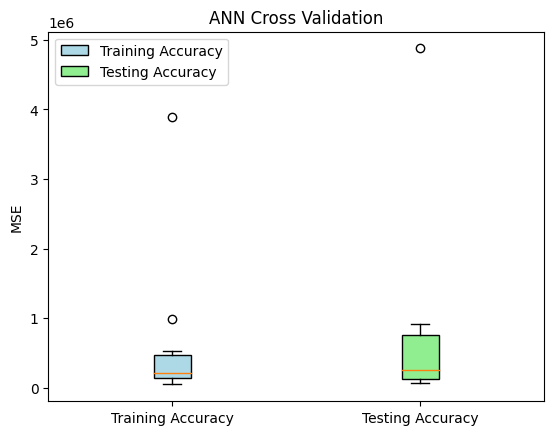

In [85]:
# Box Plots: Labels & Colours (Must be equal to number of box plots)
labels = ["Training Accuracy", "Testing Accuracy"] 
colors = ["lightblue", "lightgreen"]

fig, ax = plt.subplots()

# Mapping the Lists of MSE into the Box Plots
boxes = ax.boxplot([ANN_train_valid, ANN_test_valid], patch_artist=True, boxprops=dict(facecolor="white"))

# Filling Each Box in the Boxplots with the colour if that index
for i, box in enumerate(boxes["boxes"]):
    box.set(facecolor=colors[i])

# Labelling Title and Y Axis
ax.set_xticklabels(labels)
ax.set_title("ANN Cross Validation")
ax.set_ylabel("MSE")

# Defining a Legend at top top left
# Note: "boxes" refers to our boxes object containing all of our box plots
legend = ax.legend(boxes["boxes"], labels, loc="upper left")

plt.show()

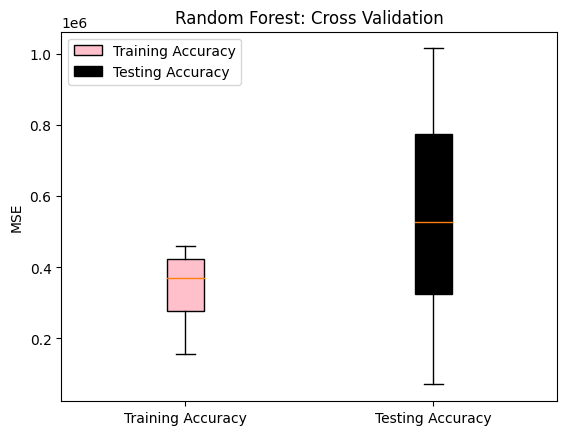

In [79]:
# Box Plots: Labels & Colours (Must be equal to number of box plots)
labels = ["Training Accuracy", "Testing Accuracy"] 
colors = ["pink", "black"]

fig, ax = plt.subplots()

boxes = ax.boxplot([RFR_train_valid, RFR_test_valid], patch_artist=True, boxprops=dict(facecolor="white"))

# Fill Each box with the color in the color array
for i, box in enumerate(boxes["boxes"]):
    box.set(facecolor=colors[i])

# Title and X Labels
ax.set_xticklabels(labels)
ax.set_title("Random Forest: Cross Validation")
ax.set_ylabel("MSE")

# Legend top Left
# Note: "boxes" refers to our boxes object containing our box plots
legend = ax.legend(boxes["boxes"], labels, loc="upper left")

plt.show()

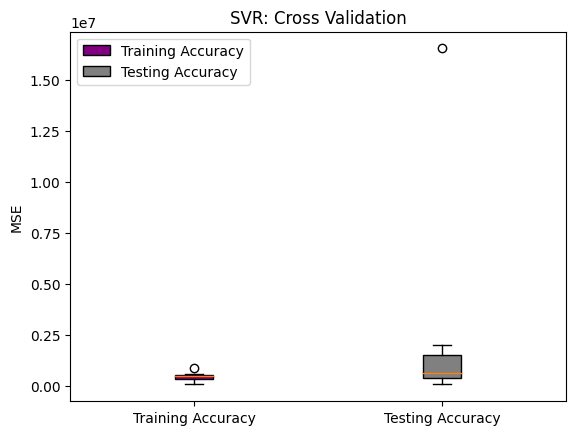

In [81]:
# Box Plots: Labels & Colors (Must be equal to number of box plots)
labels = ["Training Accuracy", "Testing Accuracy"] 
colors = ["purple", "grey"]

fig, ax = plt.subplots()

boxes = ax.boxplot([SVR_train_valid, SVR_test_valid], patch_artist=True, boxprops=dict(facecolor="white"))

# Filling Each box in the box plots object
for i, box in enumerate(boxes["boxes"]):
    box.set(facecolor=colors[i])

# Title and X Labels
ax.set_xticklabels(labels)
ax.set_title("SVR: Cross Validation")
ax.set_ylabel("MSE")

# Legend top Left
# Note: "boxes" refers to our boxes object containing our box plots
legend = ax.legend(boxes["boxes"], labels, loc="upper left")

plt.show()

### Comparing all 3 Models

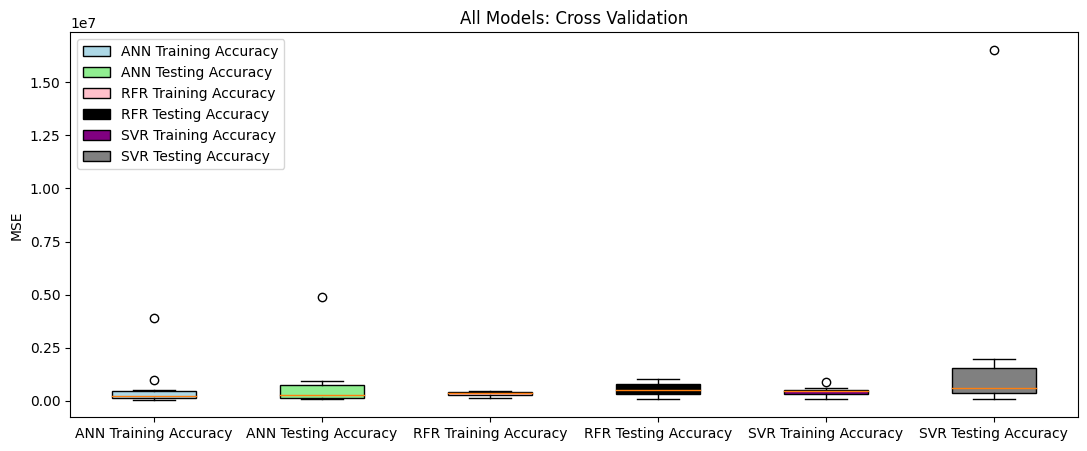

In [86]:
# Box Plots: Labels & Colors (Must be equal to number of box plots)
labels = ["ANN Training Accuracy", "ANN Testing Accuracy", "RFR Training Accuracy", "RFR Testing Accuracy", "SVR Training Accuracy", "SVR Testing Accuracy"] 
colors = ["lightblue", "lightgreen", "pink", "black", "purple", "grey"]

fig, ax = plt.subplots(figsize=(13, 5))

boxes = ax.boxplot([ANN_train_valid, ANN_test_valid, RFR_train_valid, RFR_test_valid, SVR_train_valid, SVR_test_valid], patch_artist=True, boxprops=dict(facecolor="white"))

# Filling Each box in the box plots object
for i, box in enumerate(boxes["boxes"]):
    box.set(facecolor=colors[i])

# Title and X Labels
ax.set_xticklabels(labels)
ax.set_title("All Models: Cross Validation")
ax.set_ylabel("MSE")

# Legend at top Left
# Note: "boxes" refers to our boxes object containing our box plots
legend = ax.legend(boxes["boxes"], labels, loc="upper left")

plt.show()

# Part 2: Optimisation

## 2.1 Generation of Random Results

Distances holds 12 locations and distances to each location. 12 x 12 matrix.

The problem

*   3 Routes with Pick 4 locations/Nodes. We are trying to minimise 


Note: Only I Am only concerned about 1 half, above the diagonal of zeros

In [87]:
# Gave each Node a name. Each Integer is a Node.
distances_cols = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"] 

#12x12 matrix of distances
distances_df = pd.read_csv("distances.csv", names = distances_cols)

In [88]:
# Numpy Array of the Adjacency List
np_distance_arr = distances_df.to_numpy()

### Fitness Function
### **fitness_function_full_dist()**

The fitness function is the sum of the total distance of all three routes

Look the hill_climber class for the fitness_function_full_dist()



## 2.2 Algorithm Implementation

*   We are looking for a solution of 4 nodes from 0 - 11 (12 tot)
*   We need 3 Solutions
*   The final/most optimal solution is the same length/fitness
*   Optimal solution doesn not have a repeating node in any of the 3 arrays



### GA: Genetic Mutations

Nitr: Number of Iterations/Generations

Each function will be it's own hill climber

In [89]:
class hill_climber():
  # Nitr: Num Iterations/Generations
  # select_hill_climber: Pick option 1."ruin", 2. "swap", 3. "shuffle" (Must be exact)
  def __init__(self, np_distances, nitr, select_hill_climber):
    self.np_distances = np_distances
    self.select_hill_climber = select_hill_climber
    
    # All Routes Found
    self.archive = []

    # Lists of Worst, Mean, Avg
    self.fitness_scores = [] # Holds all fitness: Used for calculatios
    self.worst_fitness = []
    self.mean_fitness = []
    self.best_fitness = []

    # Current Route: Random Solution
    # Initial Route: 2D array, Each Array inside is 4 long and is a new route
    # E.g [  [N0, N1, N2, N3] ,  [N4, N5, N6, N7], [N8, N9, N10, N11]]
    self.current_route = [] # Best Route Known

    self.init_first_route() # Current Route Initialised

    if select_hill_climber == "ruin":
      self.ruin_and_recreate(nitr)
    elif select_hill_climber == "swap":
      self.swap(nitr)
    elif select_hill_climber == "shuffle":
      self.shuffle(nitr)
    else:
      print("Error: Must Select Either swap, shuffle, ruin")
  
  # Added to archive
  def init_first_route(self):
    items_added = []

    for i in range(3):
      current_row = []
      for j in range(4):
        rnd_item = random.randint(0, 11)
        # Loops until unique: Can't have a repeat of a node
        while rnd_item in items_added:
          rnd_item = random.randint(0, 11)
        current_row.append(rnd_item)
        items_added.append(rnd_item)

      # First Route Initialised
      self.current_route.append(current_row)


    # Adding First, Best, Mean & Worst by default
    fitness = self.fitness_function_full_dist(self.current_route)
    self.fitness_scores.append(fitness)
    self.mean_fitness.append(fitness)
    self.worst_fitness.append(fitness)
    self.best_fitness.append(fitness)
    
    # Adding to Archive
    self.archive.append(self.current_route)

  ############### Mutation Behaviours ########################

  def ruin_and_recreate(self, nitr):
    while nitr != 0:
      # Last Item Added is Previous
      archive_last_item = self.archive[-1]

      # Initialising the Fitness
      prev_fitness = self.fitness_function_full_dist(archive_last_item)
      
      # Recreate the full route
      temp = [] # New 2D array

      items_added = []
      for i in range(3):
        current_row = []
        for j in range(4):
          rnd_item = random.randint(0, 11)
          # Loops until unique: Can't have a repeat of a node
          while rnd_item in items_added:
            rnd_item = random.randint(0, 11)
          current_row.append(rnd_item)
          items_added.append(rnd_item)
        # Building temp route
        temp.append(current_row)

      # Compare fitness of current to previous
      current_fitness = self.fitness_function_full_dist(temp)


      # Keep the best 1: Minimising
      # Only Adding to Archive Best Better Solutions
      if current_fitness < prev_fitness:
        self.current_route = temp
        self.archive.append(self.current_route)
        self.best_fitness.append(current_fitness)
      # Not better than the best known
      # Making the best of this iter equal the last best
      else:
        self.best_fitness.append(self.best_fitness[-1])

      # For Everything
      self.mean_fitness.append(np.mean(self.fitness_scores))

      # Check if it's the worst known so far
      if current_fitness > max(self.fitness_scores):
        self.worst_fitness.append(current_fitness)
      else:
        self.worst_fitness.append(self.worst_fitness[-1])

      self.fitness_scores.append(current_fitness)

      # print(f"Current Best Route: {self.current_route}")
      # print(f"Temp/Current Route: {temp}")
      # print(f"Temp/Current Fitness: {current_fitness},  Prev/Best Fitness: {prev_fitness}")

      nitr -= 1


  # Picks two random locations and then replaces 2 in in the solution.
  # Will keep the best 2. Swap The Bad two Nodes.
  # Basically popped out the biggest 4 nodes. Grabbed 2 rand locations. Replace 2 of those nodes randomly.
  def swap(self, nitr):
    while nitr != 0:
      prev_fitness = self.fitness_function_full_dist(self.current_route)
      temp_route = []
      
      dist1 = self.single_route_dist(self.current_route[0])
      dist2 = self.single_route_dist(self.current_route[1])
      dist3 = self.single_route_dist(self.current_route[2])

      nodes_popped = []

      # Trying to pick biggest value
      if (dist1 > dist2 and dist1 > dist3):
        # Nodes of other routes
        nodes_present = self.current_route.copy()
        nodes_popped = nodes_present.pop(0)

        # Building 1D arr of 4 nodes
        new_nodes = []
        for j in range(2):
          replace_node_id = random.randint(0, 3)

          rnd_item = random.randint(0, 11)
          # Loops until unique: Can't have a repeat of a node
          while rnd_item in nodes_present:
            rnd_item = random.randint(0, 11)
          nodes_popped[replace_node_id] = rnd_item 
          # print(new_nodes)

        temp_route.append(nodes_popped)
        temp_route.append(self.current_route[1])
        temp_route.append(self.current_route[2])


      elif (dist2 > dist1 and dist2 > dist3):
        # Nodes of other routes
        nodes_present = self.current_route.copy()
        nodes_popped = nodes_present.pop(1)

        # Building 1D arr of 4 nodes
        new_nodes = []
        for j in range(2):
          replace_node_id = random.randint(0, 3)
          

          rnd_item = random.randint(0, 11)
          # Loops until unique: Can't have a repeat of a node
          while rnd_item in nodes_present:
            rnd_item = random.randint(0, 11)
          nodes_popped[replace_node_id] = rnd_item 
          # print(new_nodes)

        temp_route.append(self.current_route[0])
        temp_route.append(nodes_popped)
        temp_route.append(self.current_route[2])


      elif (dist3 > dist1 and dist3 > dist2):
        # Nodes of other routes
        nodes_present = self.current_route.copy()
        nodes_popped = nodes_present.pop(2) # For Merging

        # Building 1D arr of 4 nodes
        new_nodes = []
        for j in range(2):
          replace_node_id = random.randint(0, 3)

          rnd_item = random.randint(0, 11)
          # Loops until unique: Can't have a repeat of a node
          while rnd_item in nodes_present:
            rnd_item = random.randint(0, 11)
          nodes_popped[replace_node_id] = rnd_item 
          # print(new_nodes)

        temp_route.append(self.current_route[0])
        temp_route.append(self.current_route[2])
        temp_route.append(nodes_popped)

      # Anything Else I'll just pick 1 random route of 4 nodes
      else:
        # Picking 1 of 3 random routes to change
        route_id = random.randint(0,2)

        # Nodes of other routes
        nodes_present = self.current_route.copy()
        nodes_popped = nodes_present.pop(route_id) # For Merging

        # Building 1D arr of 4 nodes
        new_nodes = []
        for j in range(2):
          replace_node_id = random.randint(0, 3)

          rnd_item = random.randint(0, 11)
          # Loops until unique: Can't have a repeat of a node
          while rnd_item in nodes_present:
            rnd_item = random.randint(0, 11)
          nodes_popped[replace_node_id] = rnd_item 
          # print(new_nodes)

        temp_route.append(self.current_route[0])
        temp_route.append(self.current_route[2])
        temp_route.append(nodes_popped)

      ########### Now Comparing: Temp Route Defined #########
      prev_fitness = self.fitness_function_full_dist(self.archive[-1])
      current_fitness = self.fitness_function_full_dist(temp_route)

      if current_fitness < prev_fitness:
        self.current_route = temp_route
        self.archive.append(self.current_route)
        self.best_fitness.append(current_fitness)
      # Making the best of this iter equal the last best
      else:
        self.best_fitness.append(min(self.best_fitness))
      
      # For Everything
      self.mean_fitness.append(np.mean(self.fitness_scores))

      # Check if it's the worst known so far
      if current_fitness > max(self.fitness_scores):
        self.worst_fitness.append(current_fitness)
      else:
        self.worst_fitness.append(self.worst_fitness[-1])

      self.fitness_scores.append(current_fitness)
      
      nitr -= 1

  # My Interpretation: Pick 4 Nodes
  # Shuffle all permutations. If better distance found then pick that.
  # When all Permutations done. Pick another pair of 4.
  def shuffle(self, nitr):
    print("shuffle")

  ############## Calculations + Miscelaneous #################

  # This will find the nodes distance to the next node
  # Continue adding the node distances until entire route is summed up
  # D is the single 4 node array
  # eg [3,4,7,8] we need to calc N3 --> N4, N4 --> N7, N7 --> N8
  # This is 3 calculations
  def single_route_dist(self, D):
    if len(D) != 4:
      print("Error: Needs to be 4 nodes")
    else:
      # We know the array is 4 items
      # each item of D is a single node

      dist1 = self.np_distances[D[0], D[1]]
      dist2 = self.np_distances[D[1], D[2]]
      dist3 = self.np_distances[D[2], D[3]]
      
      return dist1 + dist2 + dist3

  # D is the full 3 routes array of 4 nodes each
  def fitness_function_full_dist(self, D):
    if np.shape(D) != (3,4):
      print("Error: Requires the full 3 routes array")
    else:
      dist_sum = 0
      for i in range(3):
        dist_sum += self.single_route_dist(D[i])
      return dist_sum

  # Returns the arr of worst, mean and best
  # Only Run at the End
  def print_fitness(self):
    pass

### Instantiating Hill Climbers

### Running Ruin and Recreate 3 times

In [95]:
ruin = hill_climber(np_distance_arr, 500, "ruin")
swap = hill_climber(np_distance_arr, 500, "swap")

## 2.3 Visualisation of Results

## Visualising Ruin and Recreate Hill Climber

### The Best Results Found So far: 500 iterations

Note Each Number is a Node which is a different place

In [96]:
print(f"The Best Route Found {ruin.current_route}, Best Fitness Found: {ruin.best_fitness[-1]}")

The Best Route Found [[9, 8, 11, 10], [4, 5, 7, 6], [3, 2, 1, 0]], Best Fitness Found: 17.330852134192405


Text(0, 0.5, 'f(x) Sum of all 3 routes')

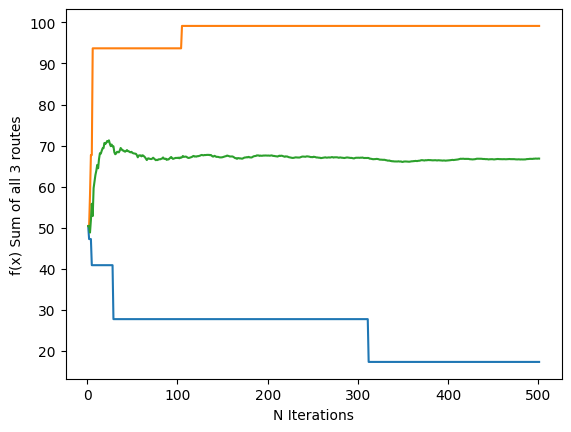

In [97]:
x_vals = range(1,502)
plt.plot(x_vals, ruin.best_fitness)
plt.plot(x_vals, ruin.worst_fitness)
plt.plot(x_vals, ruin.mean_fitness)

plt
plt.xlabel("N Iterations")
plt.ylabel("f(x) Sum of all 3 routes")

## Visualising the Swap Hill Climber

### The Best Results Found So far: 500 iterations

Note Each Number is a Node which is a different place

In [98]:
print(f"The Best Route Found {swap.current_route}, Best Fitness Found: {swap.best_fitness[-1]}")

The Best Route Found [[9, 10, 5, 2], [7, 7, 7, 7], [7, 7, 7, 7]], Best Fitness Found: 23.886259148950533


Text(0, 0.5, 'f(x) Sum of all 3 routes')

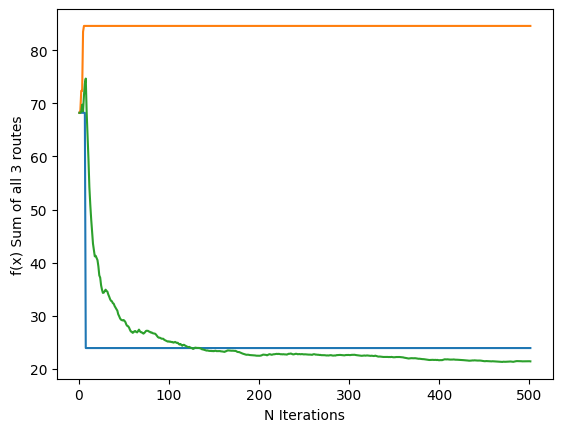

In [99]:
x_vals = range(1,502)
plt.plot(x_vals, swap.best_fitness)
plt.plot(x_vals, swap.worst_fitness)
plt.plot(x_vals, swap.mean_fitness)

plt
plt.xlabel("N Iterations")
plt.ylabel("f(x) Sum of all 3 routes")

# References

Schaffer, C. (1993) “Overfitting Avoidance as Bias,” Machine Learning, 10(2), pp. 153–178. Available at: https://doi.org/10.1023/a:1022653209073. 